# ***Desicion Tree Implementation***

In [115]:
X.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'PaperlessBilling', 'MonthlyCharges', 'TotalCharges',
       'InternetService_DSL', 'InternetService_Fiber optic',
       'InternetService_No', 'Contract_Month-to-month', 'Contract_One year',
       'Contract_Two year', 'PaymentMethod_Bank transfer (automatic)',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype='object')

In [116]:
Y = Y.to_frame() 
Y.columns

Index(['Churn'], dtype='object')

In [117]:
# Model Training 
x_train , x_test , y_train ,y_test = train_test_split(X,Y,test_size =0.2,random_state=42)  # random_state = Controls the shuffling applied to the data before applying the split
#With random_state=None , we get different train and test sets across different executions and the shuffling process is out of control.
# With random_state=0 , we get the same train and test sets across different executions.


In [118]:
#from urllib.parse import MAX_CACHE_SIZE
classifier = DecisionTreeClassifier(max_leaf_nodes=10,criterion="gini") # fitting decision tree model on data 
#*, criterion: str = "gini", splitter: str = "best", max_depth: Unknown | None = None, 
# min_samples_split: int = 2, min_samples_leaf: int = 1, min_weight_fraction_leaf: float = 0, max_features: Unknown | None = None, 
# random_state: Unknown | None = None, max_leaf_nodes: Unknown | None = None, min_impurity_decrease: float = 0, class_weight: Unknown | None = None, 
# ccp_alpha: float = 0) -> None

In [119]:
classifier.fit(x_train,y_train) 

DecisionTreeClassifier(max_leaf_nodes=10)

In [120]:
# predicting values on test set 
y_predicted = classifier.predict(x_test)

In [121]:
from sklearn.metrics import accuracy_score
# checking test accuracy 
accuracy_score(y_test,y_predicted)*100

76.7590618336887

In [122]:
from sklearn.metrics._plot.confusion_matrix import confusion_matrix
confusion_matrix(y_test,y_predicted)

array([[843, 190],
       [137, 237]])

#***PrePruning***

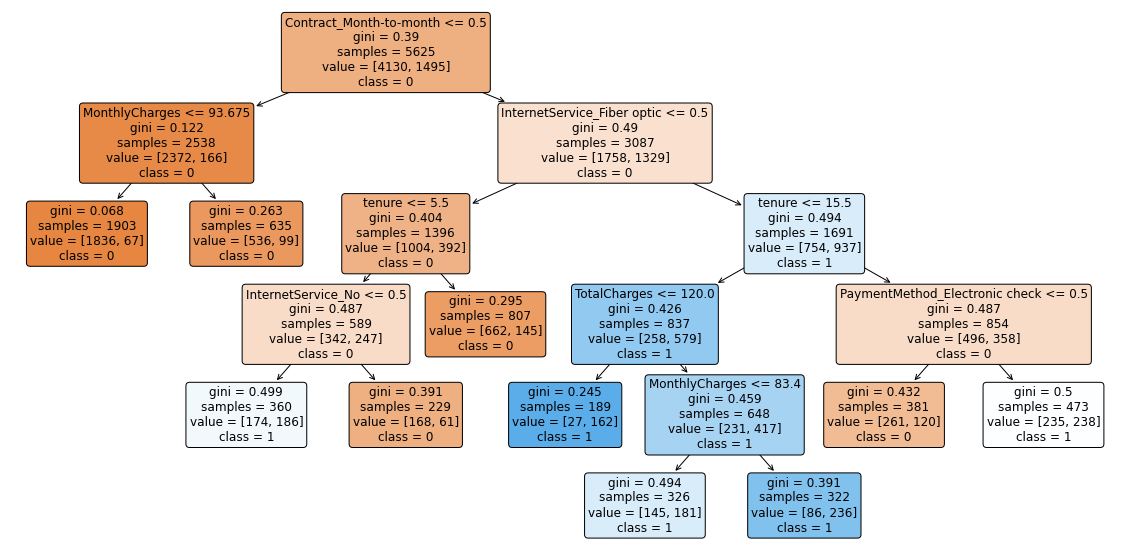

In [123]:
plt.figure(figsize=(20,10))
tree.plot_tree(classifier,filled = True, rounded=True, feature_names = x_train.columns, class_names = ['0','1'], fontsize=12)
plt.show()

In [124]:
#GRID SEARCH FOR FINDING BEST PARAMETERS 
from sklearn.model_selection import GridSearchCV
grid_parm = {"criterion":["gini","entropy"], "splitter":["best","random"]}
grid_search = GridSearchCV(estimator=classifier, param_grid=grid_parm,cv=5,n_jobs =-1)
grid_search.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(max_leaf_nodes=10),
             n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'splitter': ['best', 'random']})

In [125]:
print(grid_search.best_params_)

{'criterion': 'gini', 'splitter': 'best'}


In [126]:
classifier_1 = DecisionTreeClassifier(max_leaf_nodes=10,criterion="entropy", splitter="random")
classifier_1.fit(x_train,y_train)
y1_predicted = classifier_1.predict(x_test)
accuracy_score(y_test,y1_predicted)*100


76.54584221748401

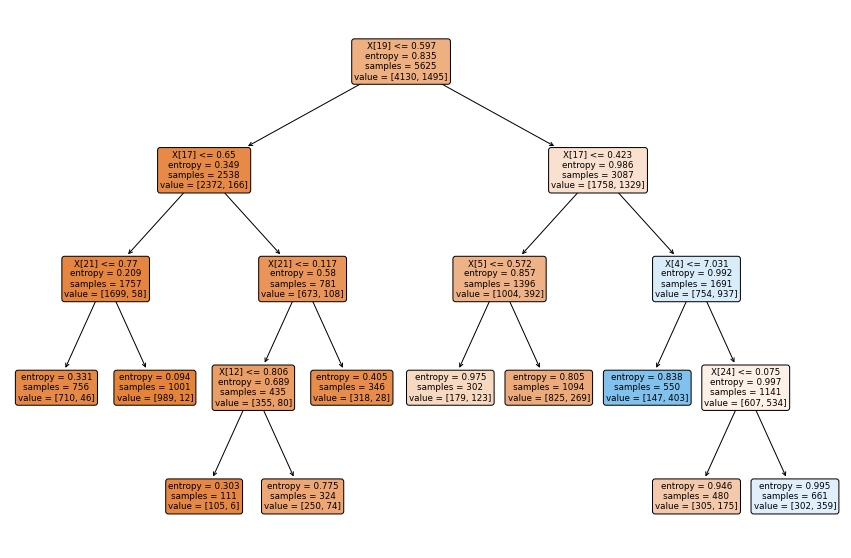

In [127]:
plt.figure(figsize=(15,10))
tree.plot_tree(classifier_1, rounded=True, filled=True)
plt.show()